# Análise de Padrão de Pontos

In [1]:
import geopandas as gpd
import fiona as f
from pointpats import PointPattern
import matplotlib.pyplot as plt


/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/9t/_sm_x0m957lf5z6q_l21z3dm0000gn/T/ipykernel_9039/2228379399.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get s

In [3]:
# Conhecendo as layers de um geopackage
f.listlayers('../data/cetesb.gpkg')

['pocos_abc', 'mun_abc', 'contaminadas_abc', 'cetesb']

In [4]:
# lendo as layers com geopandas

pocos_abc = gpd.read_file('../data/cetesb.gpkg', layer='pocos_abc')
mun_abc = gpd.read_file('../data/cetesb.gpkg', layer='mun_abc')
cetesb = gpd.read_file('../data/cetesb.gpkg', layer='cetesb')

[]

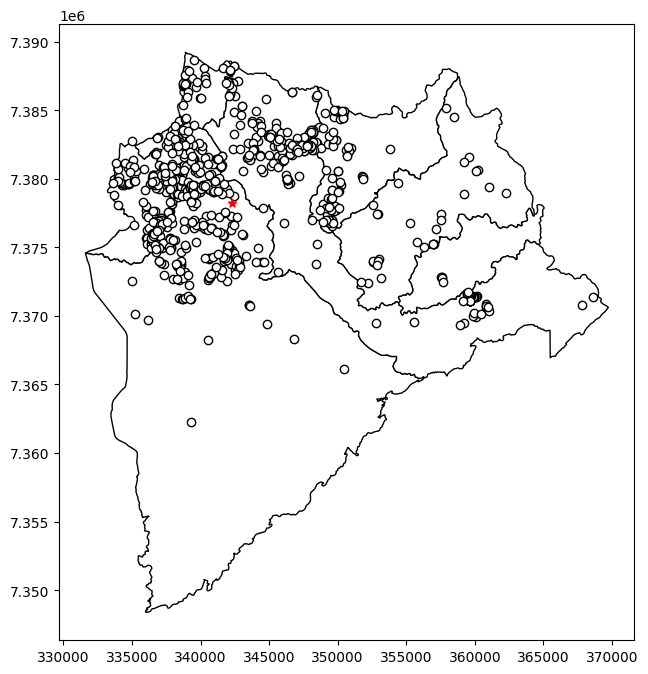

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
mun_abc.plot(ax = ax, color='white', edgecolor='k')
pocos_abc.plot(ax=ax, color='white', edgecolor='k')
cetesb.plot(ax =ax, color='red', marker='*')
plt.plot()

In [6]:
pocos_abc.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Extra - Convertendo para SIRGAS UTM 23S

In [7]:
teste = pocos_abc[['latitude_d', 'longitude_']]

In [8]:
teste = gpd.GeoDataFrame(teste,
                         geometry=gpd.points_from_xy(x=teste['longitude_'],
                                                     y=teste['latitude_d']),
                          crs='SIRGAS2000')

In [9]:
teste

,latitude_d,longitude_,geometry
0,-23.686111,-46.591944,POINT (-46.59194 -23.68611)
1,-23.679166,-46.590833,POINT (-46.59083 -23.67917)
2,-23.683333,-46.628333,POINT (-46.62833 -23.68333)
3,-23.676944,-46.581944,POINT (-46.58194 -23.67694)
4,-23.690833,-46.591944,POINT (-46.59194 -23.69083)
...,...,...,...
828,-23.611944,-46.546944,POINT (-46.54694 -23.61194)
829,-23.611389,-46.546944,POINT (-46.54694 -23.61139)
830,-23.611944,-46.576389,POINT (-46.57639 -23.61194)
831,-23.625833,-46.577500,POINT (-46.57750 -23.62583)


In [10]:
# convertendo para SIRGAS2000 23S

teste = teste.to_crs('EPSG:31983')

In [11]:
teste.head()

,latitude_d,longitude_,geometry
0,-23.686111,-46.591944,POINT (337677.117 7379618.566)
1,-23.679166,-46.590833,POINT (337781.840 7380388.909)
2,-23.683333,-46.628333,POINT (333962.518 7379884.294)
3,-23.676944,-46.581944,POINT (338685.685 7380645.053)
4,-23.690833,-46.591944,POINT (337682.955 7379095.658)


In [12]:
pocos_abc.head(1)

,ponto,latitude_d,longitude_,utme,utmn,municipio,vazao_esta,contamina,geometry
0,3.500005e+09,-23.686111,-46.591944,337670.0,7379600.0,Diadema,NaN,1,POINT (337677.117 7379618.566)


# ESDA Pontos

In [13]:
x = pocos_abc['geometry'].x
y = pocos_abc['geometry'].y

In [73]:
import numpy as np

In [15]:
pontos = np.vstack((x, y)).T

In [16]:
pontos

array([[ 337677.1165615 , 7379618.56605125],
       [ 337781.84038055, 7380388.90926   ],
       [ 333962.51831638, 7379884.29437914],
       ...,
       [ 339172.79322129, 7387849.2584876 ],
       [ 339076.39686808, 7386309.98028204],
       [ 339023.40506591, 7385970.9409684 ]])

In [17]:
#### passar os pontos para a PointPattern
pp = PointPattern(pontos)

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [18]:
pp.points

,x,y
0,337677.116561,7.379619e+06
1,337781.840381,7.380389e+06
2,333962.518316,7.379884e+06
3,338685.685355,7.380645e+06
4,337682.955232,7.379096e+06
...,...,...
828,342177.350824,7.387882e+06
829,342176.686038,7.387944e+06
830,339172.793221,7.387849e+06
831,339076.396868,7.386310e+06


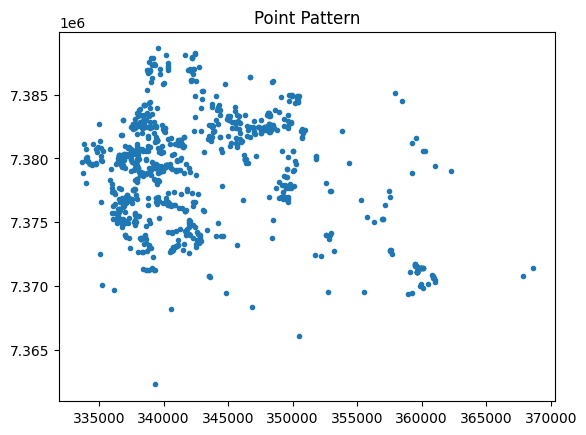

In [19]:
pp.plot()

# Centro Médio

In [20]:
from pointpats.centrography import mean_center, weighted_mean_center, std_distance, ellipse

In [21]:
mc = mean_center(pp.points)

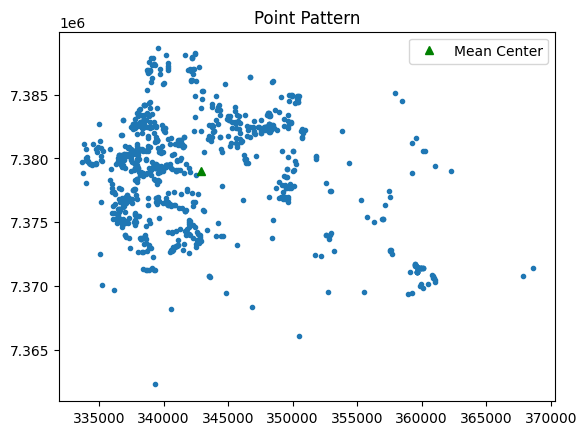

In [22]:
pp.plot()
plt.plot(mc[0],mc[1], 'g^', label='Mean Center')
plt.legend()

[]

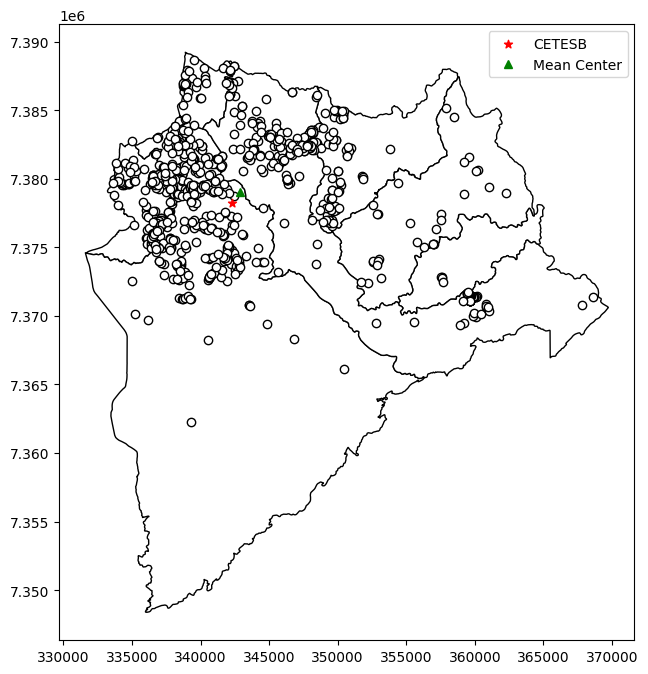

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
mun_abc.plot(ax = ax, color='white', edgecolor='k')
pocos_abc.plot(ax=ax, color='white', edgecolor='k')
cetesb.plot(ax =ax, color='red', marker='*', label='CETESB')
plt.plot(mc[0], mc[1], 'g^', label='Mean Center')
plt.legend()
plt.plot()

# Centro Médio Ponderado

In [24]:
pocos_abc2 = pocos_abc.query('vazao_esta.notna()', engine='python')

In [25]:
pesos = pocos_abc2['vazao_esta']

In [26]:
x2 = pocos_abc2['geometry'].x
y2 = pocos_abc2['geometry'].y

In [27]:
pontos2 = np.vstack((x2, y2)).T

In [28]:
pp2 = PointPattern(pontos2)

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [29]:
wmc = weighted_mean_center(pp2.points, pesos)

In [30]:
mc

array([ 342882.04378026, 7379050.18496581])

In [31]:
wmc

array([ 342473.2345118 , 7378834.96229186])

[]

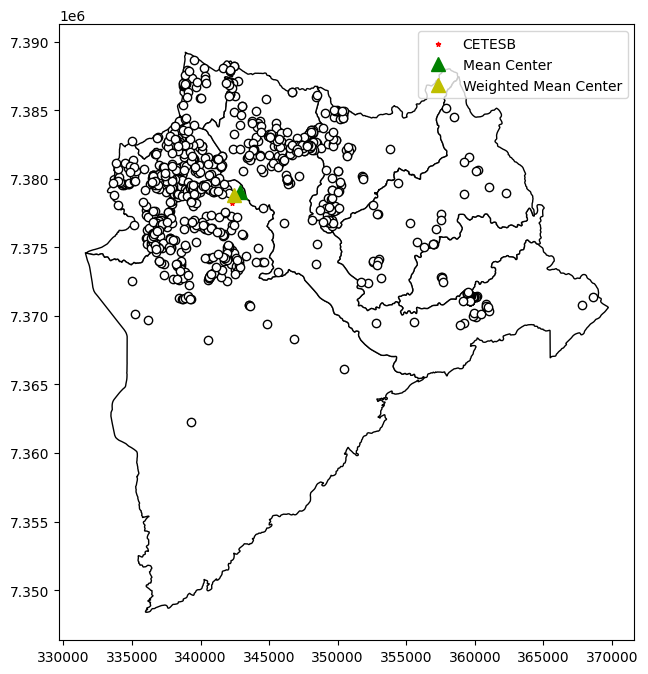

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
mun_abc.plot(ax = ax, color='white', edgecolor='k')
pocos_abc.plot(ax=ax, color='white', edgecolor='k')
cetesb.plot(ax =ax, color='red', marker='*', label='CETESB', markersize=10)
plt.plot(mc[0], mc[1], 'g^', label='Mean Center', markersize=10)
plt.plot(wmc[0], wmc[1], 'y^', label='Weighted Mean Center', markersize=10)
plt.legend()
plt.plot()


# Distância Padrão

In [33]:
stdd = std_distance(pp.points)

In [34]:
stdd

7929.112745451677

[]

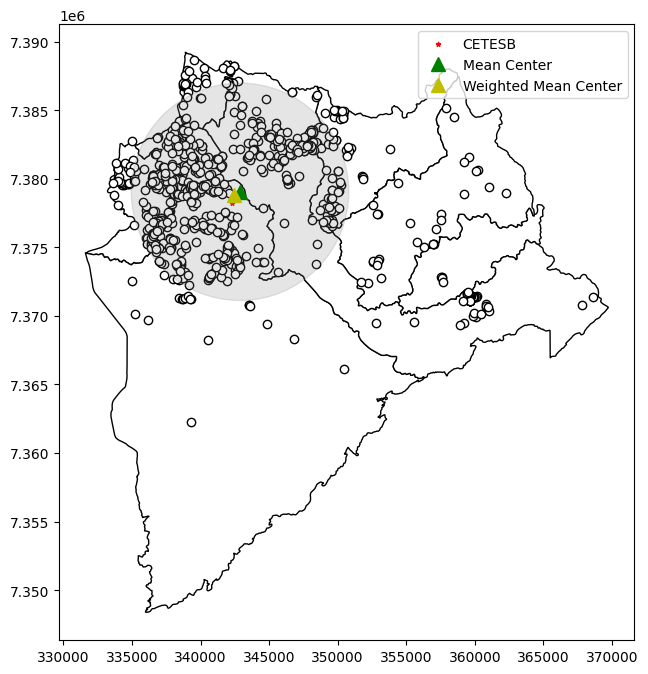

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
mun_abc.plot(ax = ax, color='white', edgecolor='k')
pocos_abc.plot(ax=ax, color='white', edgecolor='k')
cetesb.plot(ax =ax, color='red', marker='*', label='CETESB', markersize=10)
plt.plot(mc[0], mc[1], 'g^', label='Mean Center', markersize=10)
plt.plot(wmc[0], wmc[1], 'y^', label='Weighted Mean Center', markersize=10)
circle1=plt.Circle((mc[0], mc[1]),stdd,color='gray', alpha = 0.2)
ax.add_artist(circle1)
plt.legend()
plt.plot()


# Elipse de Distância Padrão

In [36]:
sx, sy, theta = ellipse(pp.points)

In [37]:
theta_degree = np.degrees(theta)

In [38]:
from matplotlib.patches import Ellipse

In [39]:
elipse = Ellipse(xy=mean_center(pp.points),
                 width=sx*2,
                 height=sy*2,
                 angle = -theta_degree,
                 color='grey',
                 alpha = 0.2)

[]

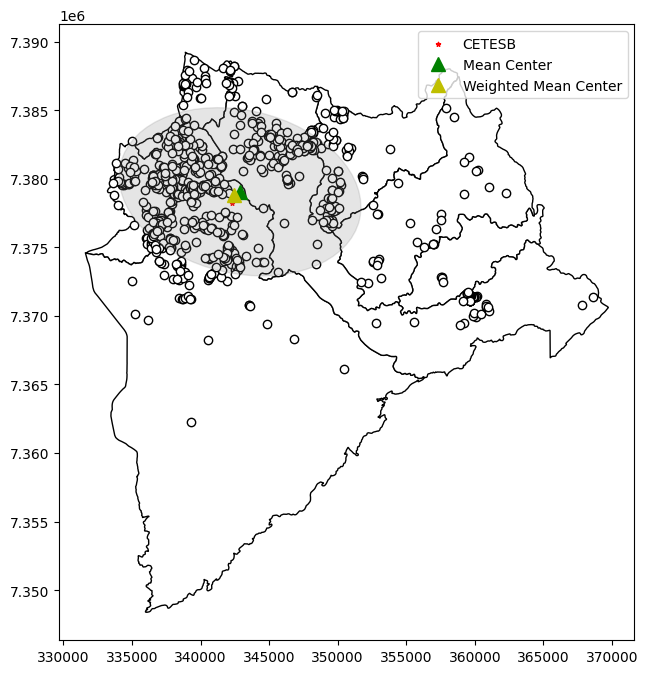

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
mun_abc.plot(ax = ax, color='white', edgecolor='k')
pocos_abc.plot(ax=ax, color='white', edgecolor='k')
cetesb.plot(ax =ax, color='red', marker='*', label='CETESB', markersize=10)
plt.plot(mc[0], mc[1], 'g^', label='Mean Center', markersize=10)
plt.plot(wmc[0], wmc[1], 'y^', label='Weighted Mean Center', markersize=10)
ax.add_artist(elipse)
plt.legend()
plt.plot()


[]

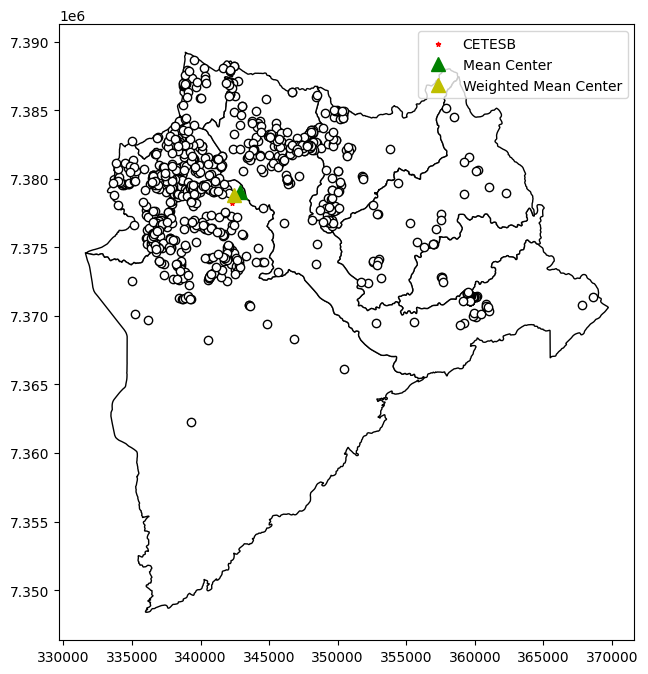

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
mun_abc.plot(ax = ax, color='white', edgecolor='k')
pocos_abc.plot(ax=ax, color='white', edgecolor='k')
cetesb.plot(ax =ax, color='red', marker='*', label='CETESB', markersize=10)
plt.plot(mc[0], mc[1], 'g^', label='Mean Center', markersize=10)
plt.plot(wmc[0], wmc[1], 'y^', label='Weighted Mean Center', markersize=10)
plt.legend()
plt.plot()


# Fronteiras

In [42]:
from pointpats import hull

In [43]:
from pointpats import hull

In [44]:
convex_hull_vertices = hull(pontos)

In [45]:
convex_hull_vertices

array([[ 335235.15352168, 7370115.40217212],
       [ 339314.37787945, 7362285.4654334 ],
       [ 367843.69175762, 7370818.92331606],
       [ 368602.99433049, 7371379.52548123],
       [ 358481.11833487, 7384480.89980006],
       [ 357936.11581716, 7385152.33757085],
       [ 342428.46300925, 7388253.90780299],
       [ 339532.80439065, 7388622.27197588],
       [ 335006.89514656, 7382726.48934599],
       [ 333806.80010822, 7381113.10650954],
       [ 333652.95941528, 7379696.12856314],
       [ 333719.51469101, 7378835.55197955]])

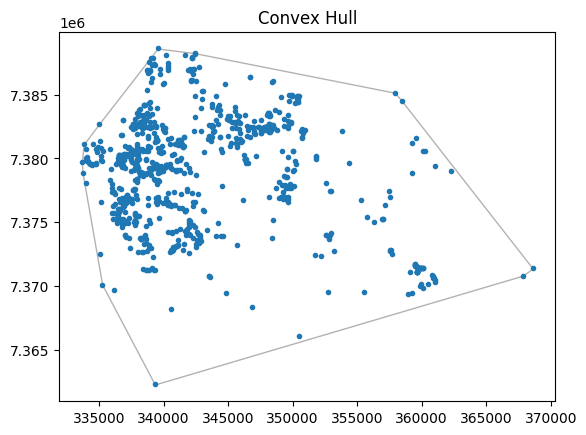

In [46]:
pp.plot(title='Convex Hull', hull=True)

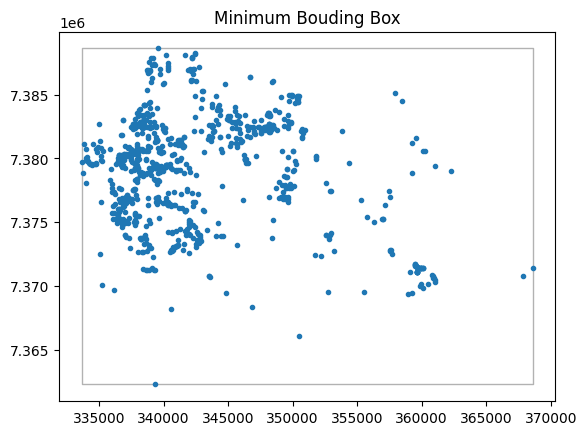

In [47]:
pp.plot(title='Minimum Bouding Box', window=True)

# Densidade

In [48]:
import pointpats.quadrat_statistics as qs

In [49]:
q_r = qs.QStatistic(pp, shape='rectangle', nx=3, ny=3)

In [50]:
q_r.chi2

1239.2148859543818

In [51]:
q_r.chi2_pvalue

3.222624052656641e-262

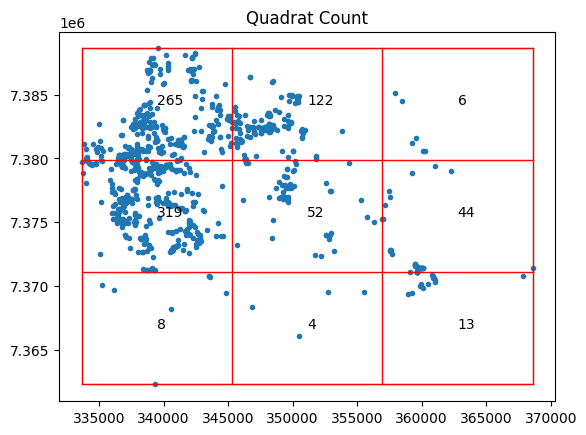

In [52]:
q_r.plot()

# Kernel

In [54]:
import seaborn as sns
%config InlineBackend.figure_format='retina'

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

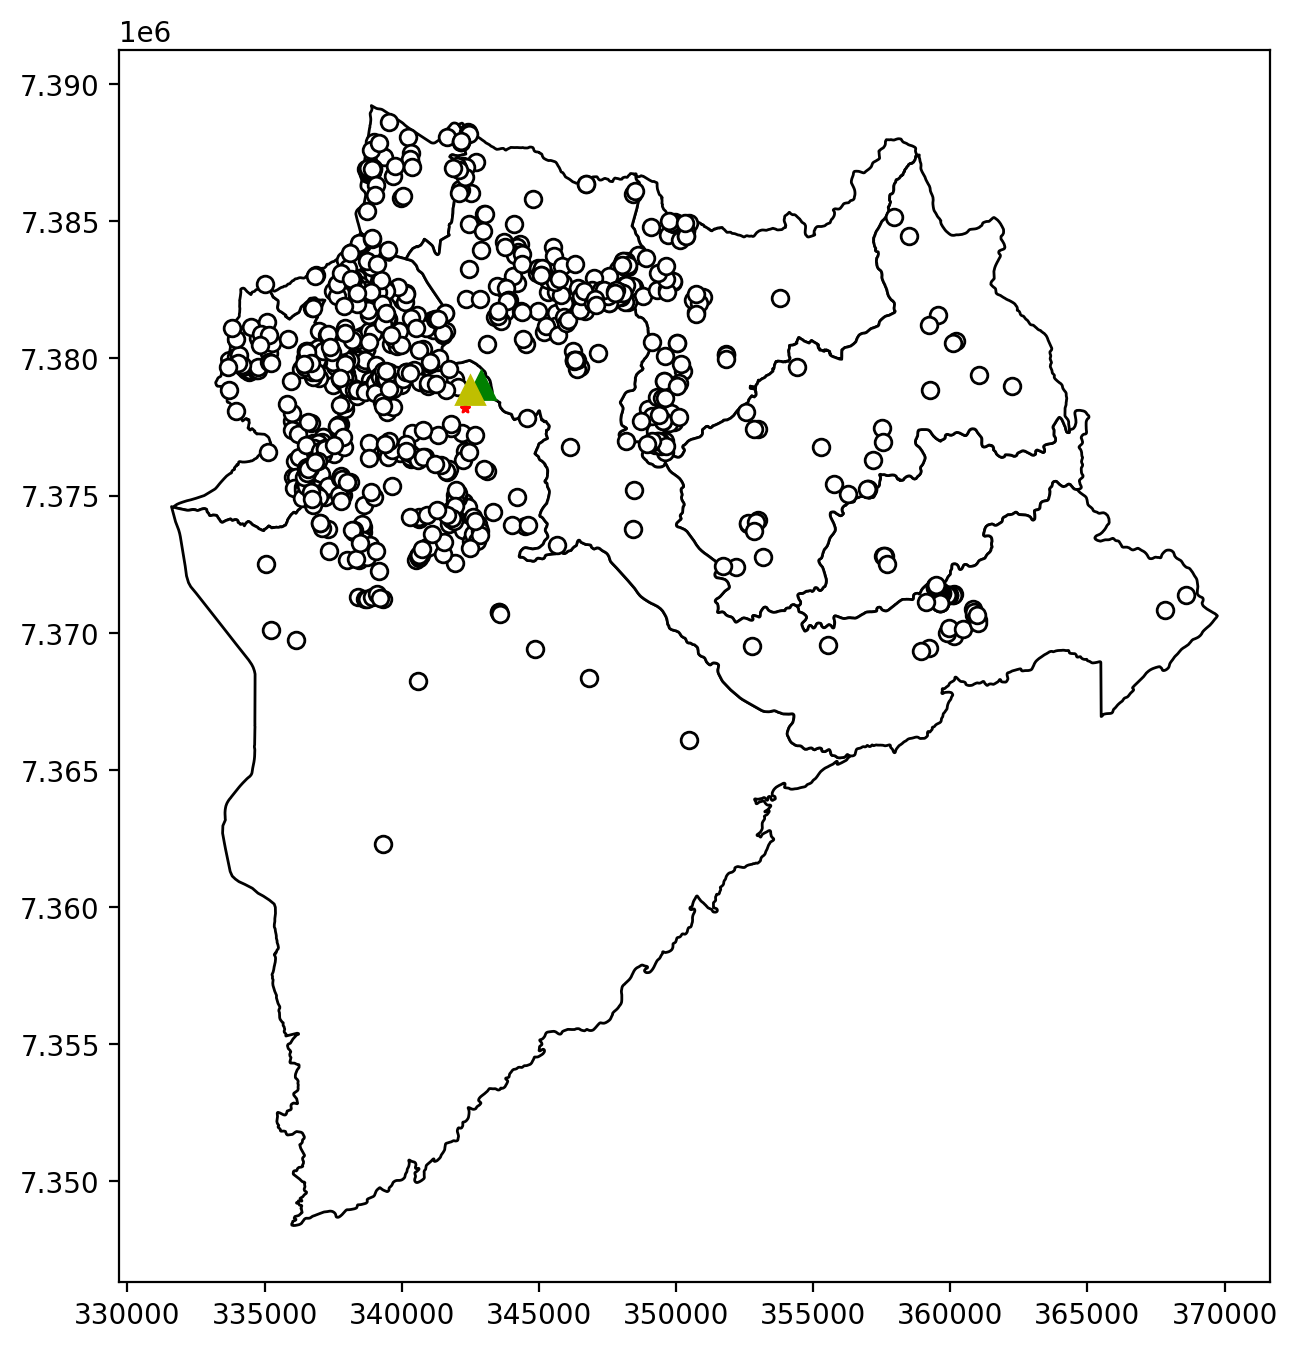

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
mun_abc.plot(ax = ax, color='white', edgecolor='k')
pocos_abc.plot(ax=ax, color='white', edgecolor='k')
cetesb.plot(ax =ax, color='red', marker='*', label='CETESB', markersize=10)
plt.plot(mc[0], mc[1], 'g^', label='Mean Center', markersize=10)
plt.plot(wmc[0], wmc[1], 'y^', label='Weighted Mean Center', markersize=10)
sns.kdeplot(pontos[:,0], pontos[:,1], shade=True, cmap='YlOrRd', ax=ax, alpha=0.6)
plt.legend()
plt.plot()


# Nearest Neighbors

In [56]:
### distância de cada ponto para o seu primeiro vizinho mais proximo
pp.knn()

(array([[ 45],
        [133],
        [ 83],
        [ 65],
        [100],
        [  4],
        [102],
        [ 18],
        [109],
        [119],
        [ 96],
        [ 12],
        [ 11],
        [133],
        [ 13],
        [139],
        [ 48],
        [ 58],
        [  7],
        [ 71],
        [137],
        [143],
        [ 78],
        [ 43],
        [ 70],
        [ 29],
        [ 27],
        [ 94],
        [132],
        [ 25],
        [ 33],
        [138],
        [ 99],
        [ 36],
        [109],
        [ 38],
        [142],
        [ 38],
        [ 35],
        [ 40],
        [ 39],
        [ 46],
        [ 40],
        [ 97],
        [ 97],
        [  0],
        [ 41],
        [ 49],
        [134],
        [ 47],
        [ 77],
        [ 52],
        [ 51],
        [ 59],
        [ 86],
        [ 58],
        [ 17],
        [  1],
        [ 17],
        [ 61],
        [113],
        [ 59],
        [135],
        [ 96],
        [ 66],
        [  3],
        [ 

In [57]:
### maxima distancia
pp.max_nnd

6084.4172261035055

In [58]:
### Mean Nearest Neighbor Distance
pp.mean_nnd

220.26253345860334

In [59]:
area = pp.window.area
perimetro = pp.window.perimeter
n = len(pocos_abc)

In [60]:
import math


In [61]:
expected_nnd = 0.5*math.sqrt(area / n) + (0.0514 + 0.041/math.sqrt(n))*(perimetro/n)

In [62]:
expected_nnd

533.3693900713264

In [63]:
NNI = pp.mean_nnd / expected_nnd

In [64]:
NNI

0.41296433120983583

# Função de K de Ripley

In [65]:
from pointpats.distance_statistics import K
from pointpats import PoissonPointProcess

In [66]:
kp = K(pp)

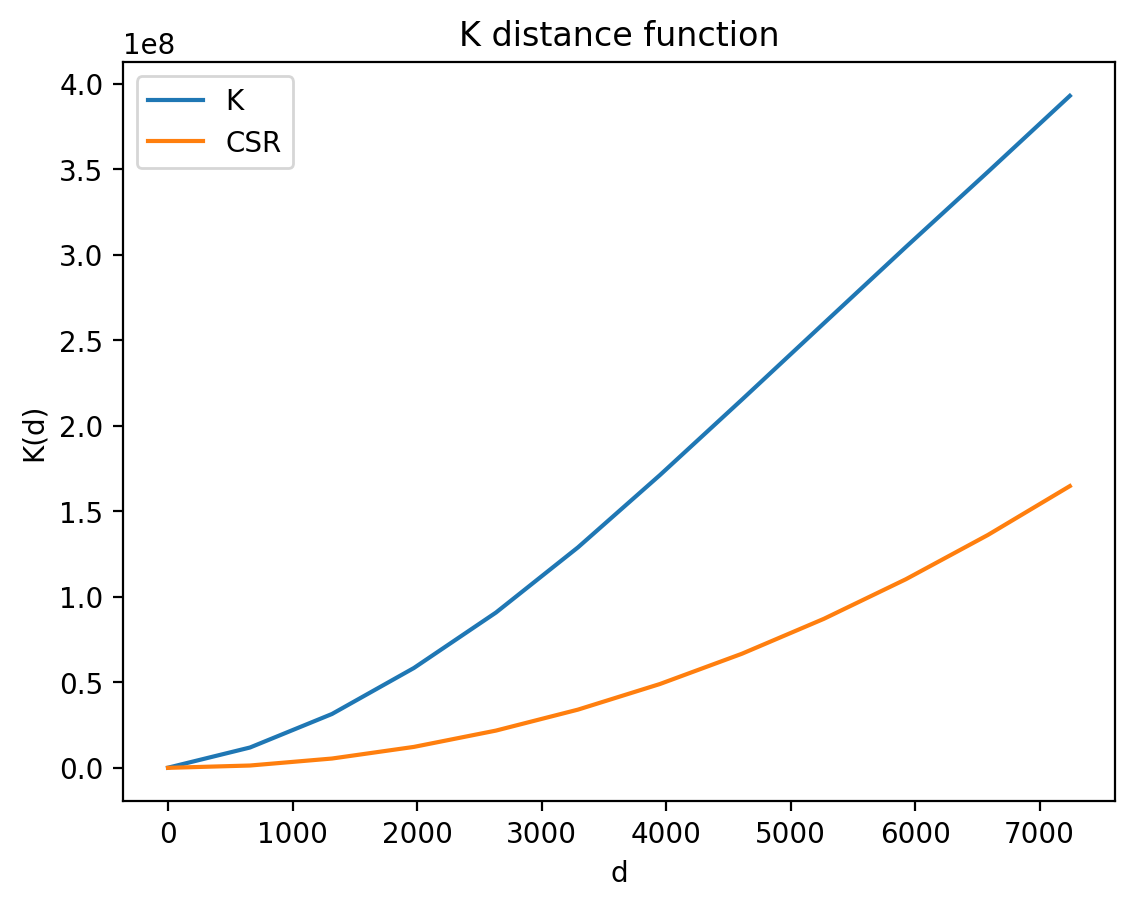

In [67]:
kp.plot()
plt.legend()

In [68]:
pp.n

833

# Envelopes

In [69]:
realizations = PoissonPointProcess(pp.window, pp.n, 100, asPP = True)

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [75]:
from pointpats.distance_statistics import Kenv

In [76]:
kenv = Kenv(pp, intervals=20, realizations=realizations)
kenv.plot()

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations